In [33]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [15]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [16]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [17]:
filter_columns = [
    'make',
    'model',
    'year',
    'engine_hp',
    'engine_cylinders',
    'transmission_type',
    'vehicle_style',
    'highway_mpg',
    'city_mpg',
    'msrp'
]

In [18]:
df = df[filter_columns]
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [23]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [22]:
df.engine_hp = df.engine_hp.fillna(0)
df.engine_cylinders = df.engine_cylinders.fillna(0)

In [26]:
df = df.rename(columns={"msrp": "price"})

In [27]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [30]:
df.transmission_type.unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [31]:
df.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

In [32]:
df.mode()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,Chevrolet,Silverado 1500,2015,200.0,4.0,AUTOMATIC,Sedan,24,17,2000


In [45]:
numeric_columns = list(df.dtypes[df.dtypes != 'object'].index)
numeric_columns.remove('price')
numeric_columns

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

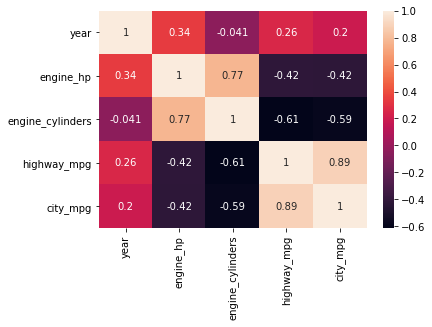

--2023-09-28 06:55:46--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... failed: Unknown error.
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... failed: Unknown error.
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... failed: Unknown error.
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... failed: Unknown error.
Retrying.

--2023-09-28 06:57:11--  (try: 2)  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... failed: Unknown error.
Connecting to raw.githubuser

In [46]:
corr_matrix = df[numeric_columns].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [56]:
df['above_average'] = (df.price > df.price.mean()).astype(int)
df.price.mean()

40594.737032063116

In [55]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [57]:
from sklearn.model_selection import train_test_split

In [70]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [71]:
len(df_full_train), len(df_test)

(9531, 2383)

In [72]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [73]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [74]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [75]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [76]:
del df_train['price']
del df_val['price']
del df_test['price']

In [77]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,0
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,0
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,1
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,0
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,0
...,...,...,...,...,...,...,...,...,...,...
7143,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,0
7144,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21,0
7145,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17,0
7146,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19,0


In [78]:
len(y_train)

7148

In [79]:
from sklearn.metrics import mutual_info_score

In [91]:
def mutual_info_above_average_score(series):
    return mutual_info_score(df_train.above_average, series)

In [81]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [87]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [94]:
mi = df_train[categorical].apply(mutual_info_above_average_score)
mi.sort_values(ascending=False).round(2)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

In [95]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler']
48

model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class']
915

year
[2011 2012 2013 1992 1993]
28

engine_hp
[335. 300. 230. 320. 172.]
357

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']
5

vehicle_style
['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

price
[46135 40650 36350 29450 34500]
6049

above_average
[1 0]
2



In [96]:
from sklearn.feature_extraction import DictVectorizer

In [97]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,0
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,0
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,1
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,0
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,0
...,...,...,...,...,...,...,...,...,...,...
7143,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,0
7144,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21,0
7145,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17,0
7146,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19,0


In [98]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [113]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [114]:
dv = DictVectorizer(sparse = False)

In [115]:
X_train = dv.fit_transform(train_dicts)

In [116]:
X_train.shape

(7148, 943)

In [117]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [118]:
X_val = dv.transform(val_dicts)

In [119]:
X_val.shape

(2383, 943)

In [120]:
from sklearn.linear_model import LogisticRegression

In [169]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [170]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [171]:
y_pred = model.predict_proba(X_val)[:, 1]

In [172]:
above_average_decision = (y_pred >= 0.5)

In [177]:
(y_val == above_average_decision).mean().round(2)

0.95

In [174]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = above_average_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [175]:
df_pred[df_pred.correct == False]

,probability,prediction,actual,correct
22,0.644571,1,0,False
39,0.327423,0,1,False
91,0.763697,1,0,False
104,0.695507,1,0,False
162,0.267942,0,1,False
...,...,...,...,...
2244,0.614354,1,0,False
2251,0.598606,1,0,False
2259,0.601271,1,0,False
2348,0.412659,0,1,False


In [178]:
full_feature_accuracy = (y_val == above_average_decision).mean()
full_feature_accuracy

0.946286193873269

In [162]:
train_columns = (categorical + numerical)
train_columns.remove('make')
train_columns

['model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [179]:
accuracy_dict = {}

for feature in (categorical + numerical):
    train_columns = (categorical + numerical)
    train_columns.remove(feature)
    
    train_dicts = df_train[train_columns].to_dict(orient='records')
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(train_dicts)
    val_dicts = df_val[train_columns].to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    above_average_decision = (y_pred >= 0.5)
    feature_accuracy = (y_val == above_average_decision).mean()
    
    accuracy_dict[f"no_{feature}_accuracy"] = [feature_accuracy, full_feature_accuracy - feature_accuracy]
    
    
accuracy_dict

{'no_make_accuracy': [0.9320184641208561, 0.014267729752412861],
 'no_model_accuracy': [0.9236256819135543, 0.022660511959714635],
 'no_transmission_type_accuracy': [0.9387326898866974, 0.007553503986571508],
 'no_vehicle_style_accuracy': [0.9437683592110785, 0.0025178346621904657],
 'no_year_accuracy': [0.9475451112043642, -0.0012589173310952884],
 'no_engine_hp_accuracy': [0.9227864036928242, 0.02349979018044479],
 'no_engine_cylinders_accuracy': [0.9471254720939991, -0.0008392782207301552],
 'no_highway_mpg_accuracy': [0.9467058329836341, -0.00041963911036513313],
 'no_city_mpg_accuracy': [0.946286193873269, 0.0]}

In [182]:
pd.DataFrame.from_dict(accuracy_dict, orient='index', columns=['feature_accuracy', 'feature_accuracy_diff'])

,feature_accuracy,feature_accuracy_diff
no_make_accuracy,0.932018,0.014268
no_model_accuracy,0.923626,0.022661
no_transmission_type_accuracy,0.938733,0.007554
no_vehicle_style_accuracy,0.943768,0.002518
no_year_accuracy,0.947545,-0.001259
no_engine_hp_accuracy,0.922786,0.023500
no_engine_cylinders_accuracy,0.947125,-0.000839
no_highway_mpg_accuracy,0.946706,-0.000420
no_city_mpg_accuracy,0.946286,0.000000


In [183]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,0
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,0
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,1
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,0
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,0
...,...,...,...,...,...,...,...,...,...,...
7143,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,0
7144,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21,0
7145,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17,0
7146,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19,0


In [185]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [186]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [187]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [188]:
import numpy as np

In [189]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [190]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [191]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,33599
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,26245
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,248000
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,24990
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,20475
...,...,...,...,...,...,...,...,...,...,...
7143,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,37655
7144,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21,25135
7145,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17,28345
7146,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19,2000


In [216]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

scaler = StandardScaler()

In [215]:
X_train_num = df_train[numerical].values

scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train_num)

In [218]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_cat = ohe.fit_transform(df_train[categorical].values)

In [219]:
X_train = np.column_stack([X_train_num, X_train_cat])

In [224]:
train_dicts = df_train[categorical].to_dict(orient='records')

In [225]:
dv = DictVectorizer(sparse = False)

In [226]:
X_train = dv.fit_transform(train_dicts)

In [227]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [228]:
model = Ridge(solver='sag', random_state=42)

In [229]:
model.fit(X_train, y_train)

Ridge(random_state=42, solver='sag')

In [230]:
y_pred = model.predict(X_val)

In [235]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [231]:
rmse(y_val, y_pred)

0.3298653912776778

In [236]:
rmse_values = {}

for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(solver='sag', random_state=42, alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    rmse_values[f"rmse_{alpha}"] = rmse(y_val, y_pred)

In [237]:
rmse_values

{'rmse_0': 0.2827076965724486,
 'rmse_0.01': 0.28014961505617614,
 'rmse_0.1': 0.27778188084716865,
 'rmse_1': 0.3298653912776778,
 'rmse_10': 0.5864395416419019}

In [243]:
df_rmse = pd.DataFrame.from_dict(rmse_values, orient='index', columns=['RMSE'])

In [246]:
df_rmse.sort_values(by=['RMSE'])

,RMSE
rmse_0.1,0.277782
rmse_0.01,0.280150
rmse_0,0.282708
rmse_1,0.329865
rmse_10,0.586440
